In [1]:
import numpy as np     #只需要下载numpy库即可
import GridWorld_v2

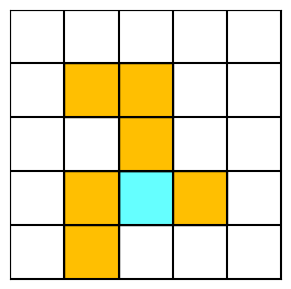

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v2.GridWorld_v2(forbidden_area_score=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()

In [3]:
class Q_learning_off_policy:
    def __init__(self,ncol,nrow,epsilon,alpha,gamma,n_action=5) -> None:
        self.Q_table = np.zeros((nrow,ncol,n_action))
        self.n_action = n_action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.state_list = []
        self.action_list = []
        self.reward_list = []
    
    def take_action(self,state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(0,5)
        else:
            action = np.argmax(self.Q_table[state[0],state[1]])
        return action

    def update(self,s0:tuple[int,int],a0,r,s1:tuple[int,int]):
        td_error = r + self.gamma * self.Q_table[s1].max() - self.Q_table[s0[0],s0[1],a0]
        self.Q_table[s0[0],s0[1],a0] += self.alpha * td_error

    def update_epsilon(self,epsilon):
        if self.epsilon > epsilon:
            self.epsilon -= 0.001

    def update_alpha(self,alpha):
        if self.alpha > alpha:
            self.alpha -= 0.0001

In [4]:
np.random.seed(0)
n_step = 5
alpha = 1
epsilon = 0.2
gamma = 0.9
agent = Q_learning_off_policy(columns,rows,epsilon,alpha,gamma)
num_episodes = 20000
return_list = []

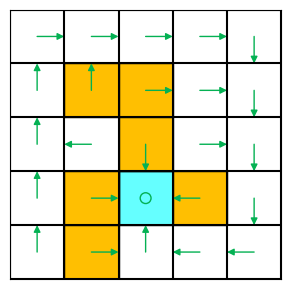

Episode 19900 return -19.0


In [5]:
for i in range(num_episodes):
    episod_return = 0
    state = gridworld.reset()
    action = agent.take_action(state)
    done = False
    while not done:
        action = agent.take_action(state)
        next_state,reward,done = gridworld.step(state,action)
        episod_return += reward
        agent.update(state,action,reward,next_state)
        state = next_state
    return_list.append(episod_return)
    if i % 100 == 0:
        gridworld.show_policy(agent.Q_table.argmax(axis=2),step=False)
        print(f"Episode {i} return {episod_return}")
    # agent.update_alpha(0.01)